# DESCRIPTION OF THE DATASET:
    Our target feature is "SeriousDlqin2yrs"

    "SeriousDlqin2yrs" likely refers to a variable or field in a dataset, particularly in the context of credit reporting or financial analysis. In simpler terms:
        
     "Serious" suggests a significant or major event.
     "Dlqin" stands for delinquency, which refers to a failure to make payments on time.
     "2yrs" indicates a time frame of two years.
        
So, "SeriousDlqin2yrs" could represent a measure or indicator of serious delinquency within the past two years. This might be used in credit scoring models or financial assessments to identify individuals who have experienced major payment issues or defaults on their financial obligations over the specified period.







In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score
from imblearn.under_sampling import NearMiss

In [3]:
#LOADING THE DATASET

train_df = pd.read_csv(r"C:\Users\ritik\Downloads\cs-training.csv")
test_df = pd.read_csv(r"C:\Users\ritik\Downloads\cs-test.csv")
(train_df.shape),(test_df.shape)

((150000, 12), (101503, 12))

ADDING THE TWO DATAFRAMES TO GET ONE DATAFRAME

In [4]:
frames = [train_df, test_df]
 
df = pd.concat(frames)
df.shape


(251503, 12)

GATHERING INFORMATION ABOUT THE DATAFRAME

In [5]:
#CHECKING THE TOP VALUES OF THE DATAFRAME

df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
#GETTING THE DISCRIPTION OF THE DATAFRAME

df.describe() 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,251503.000000,150000.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.016690e+05,251503.000000,251503.000000,251503.000000,251503.000000,244953.000000
mean,65214.153533,0.066840,5.750415,52.339694,0.434245,349.562468,6.744818e+03,8.453064,0.278370,1.016155,0.252466,0.761995
std,40078.948539,0.249746,229.633980,14.775120,4.335643,1884.792016,2.571761e+04,5.145194,4.312539,1.121935,4.299204,1.123905
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31438.500000,0.000000,0.029977,41.000000,0.000000,0.174330,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,62876.000000,0.000000,0.153575,52.000000,0.000000,0.365612,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,94314.000000,0.000000,0.561293,63.000000,0.000000,0.861754,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,7.727000e+06,85.000000,98.000000,54.000000,98.000000,43.000000


In [7]:
#GETTING THE INFO. OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            251503 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 3   age                                   251503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 5   DebtRatio                             251503 non-null  float64
 6   MonthlyIncome                         201669 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 8   NumberOfTimes90DaysLate               251503 non-null  int64  
 9   NumberRealEstateLoansOrLines          251503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 11  Numbe

In [8]:
#DELETING THE UNNAMED COLUMN
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# HANDLING MISSING VALUE

In [9]:
#CHECKING THE NULL VALUES IN ALL THE COLUMNS

df.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            49834
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        6550
dtype: int64

In [10]:
#FINDING THE SUM OF OVERALL NULL VALUES

df.isnull().sum().sum()

157887

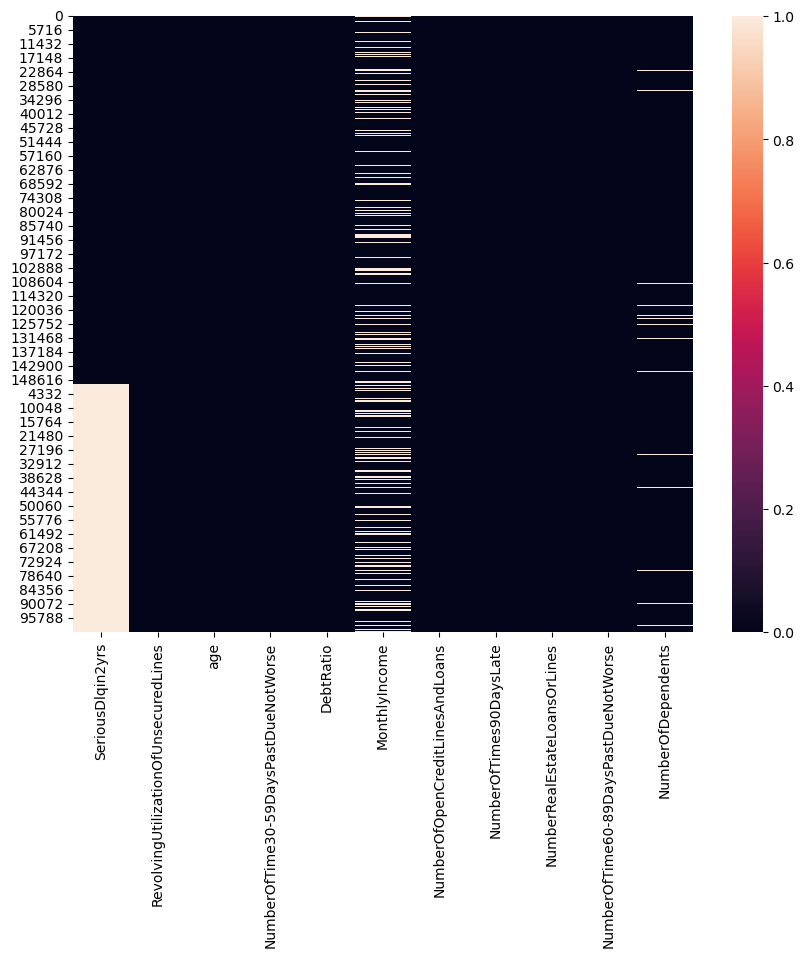

In [11]:
#VISUALISING THE DATAFRAME
#USING HEATMAP

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

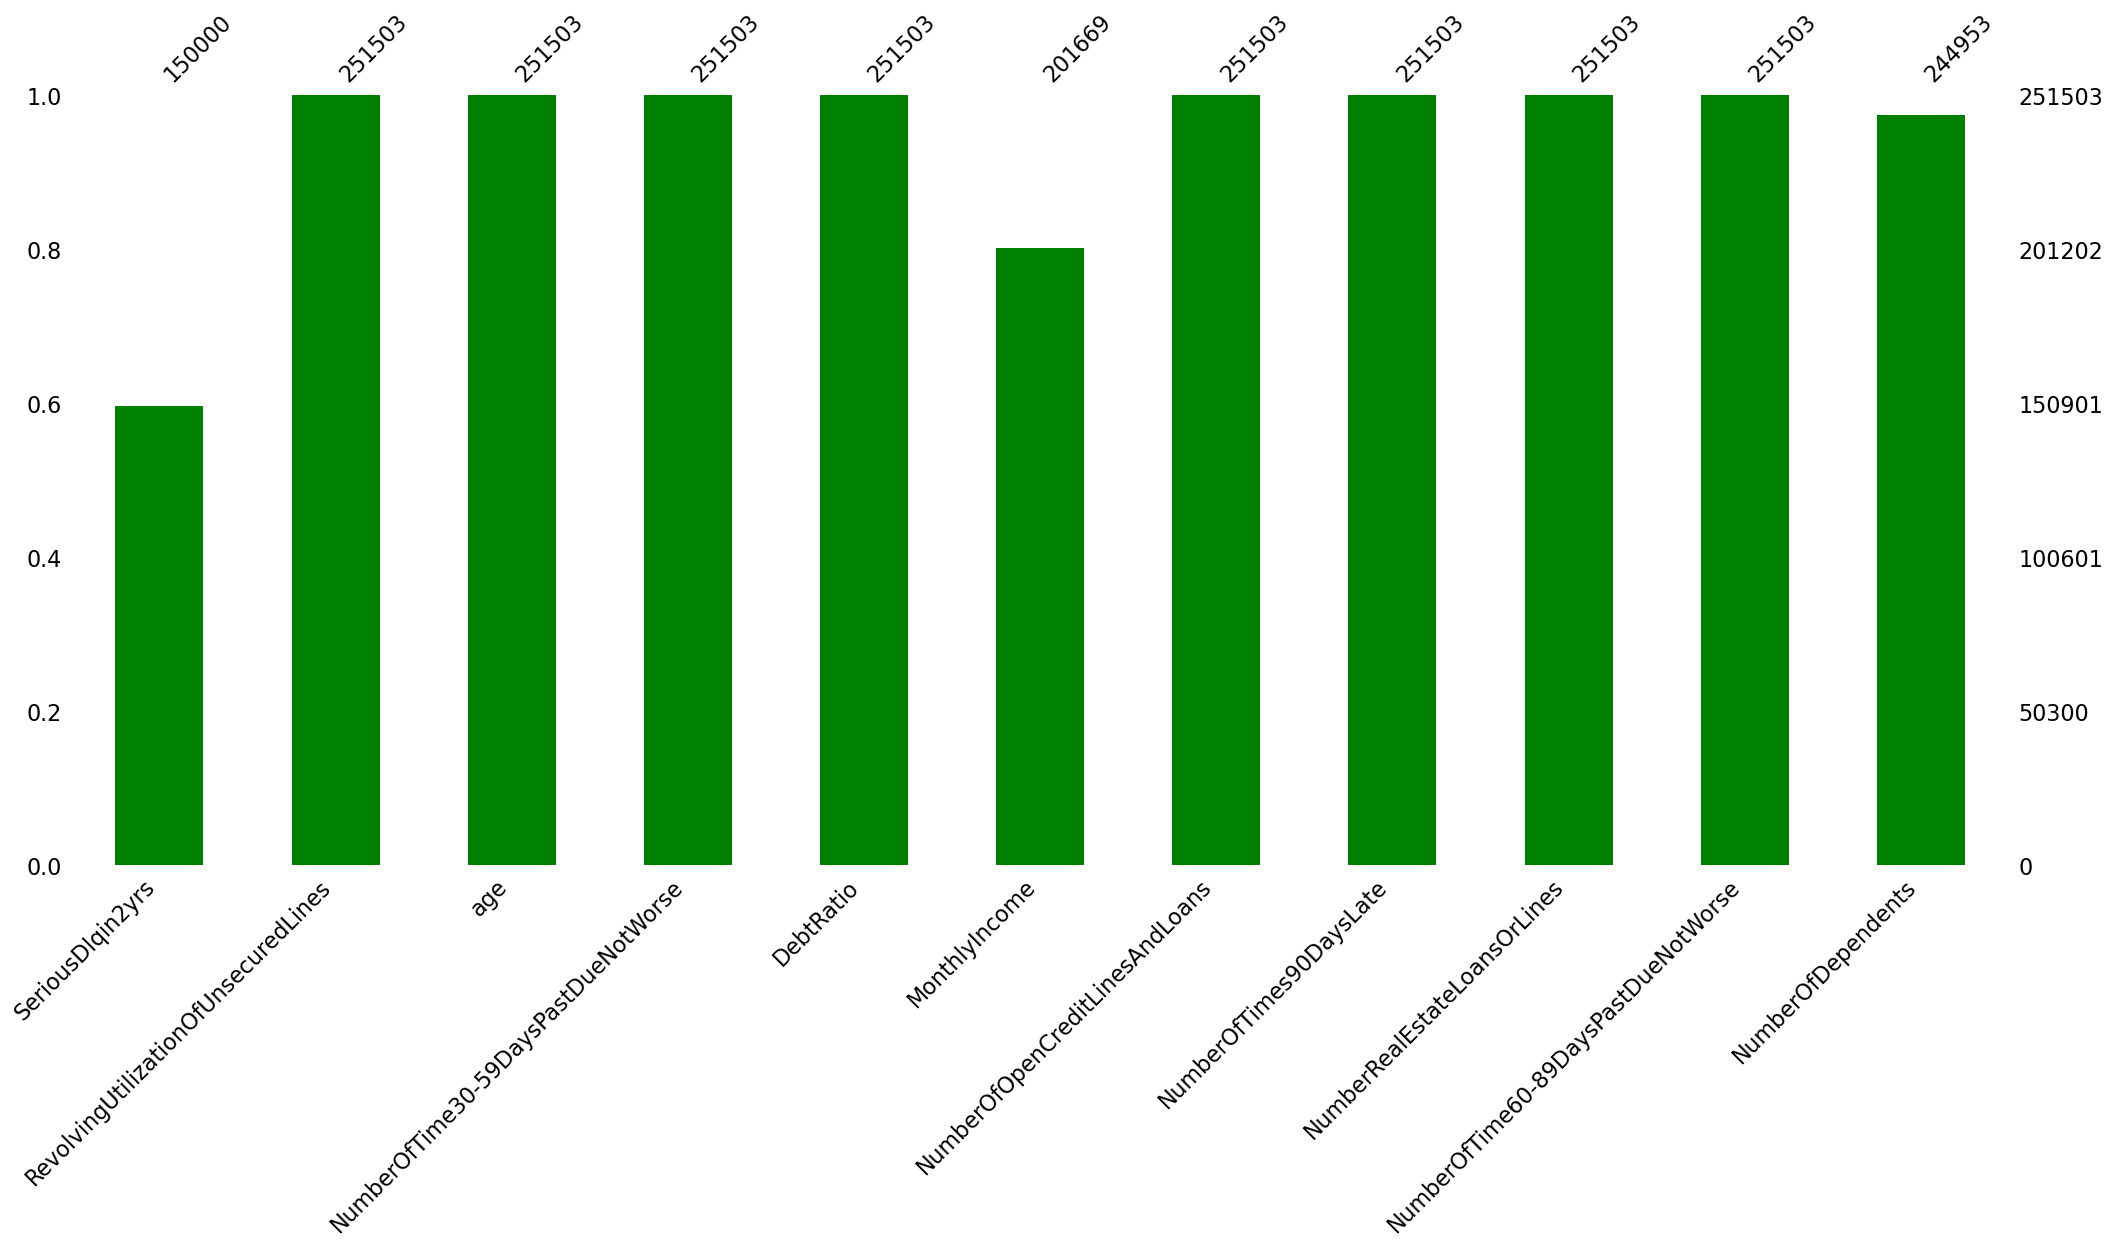

In [12]:
#THIS BARCHART WOULD GIVE US AN IDEA ABOUT HOW MANY MISSING VALUES ARE PRESENT IN EACH COLUMN

msno.bar(df,color='green')
plt.show()

In [13]:
#GETTING THE PERCENTAGE OF MISSING VALUE IN COLUMNS

per = df.isnull().sum()/df.shape[0]*100
per

SeriousDlqin2yrs                        40.358564
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.814475
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.604343
dtype: float64

In [14]:
df.shape

(251503, 11)

In [15]:
#deleting all the rows having null values
new_df = df.dropna()

In [16]:
#checking the null values
new_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [17]:
#checking the shape again
new_df.shape

(120269, 11)

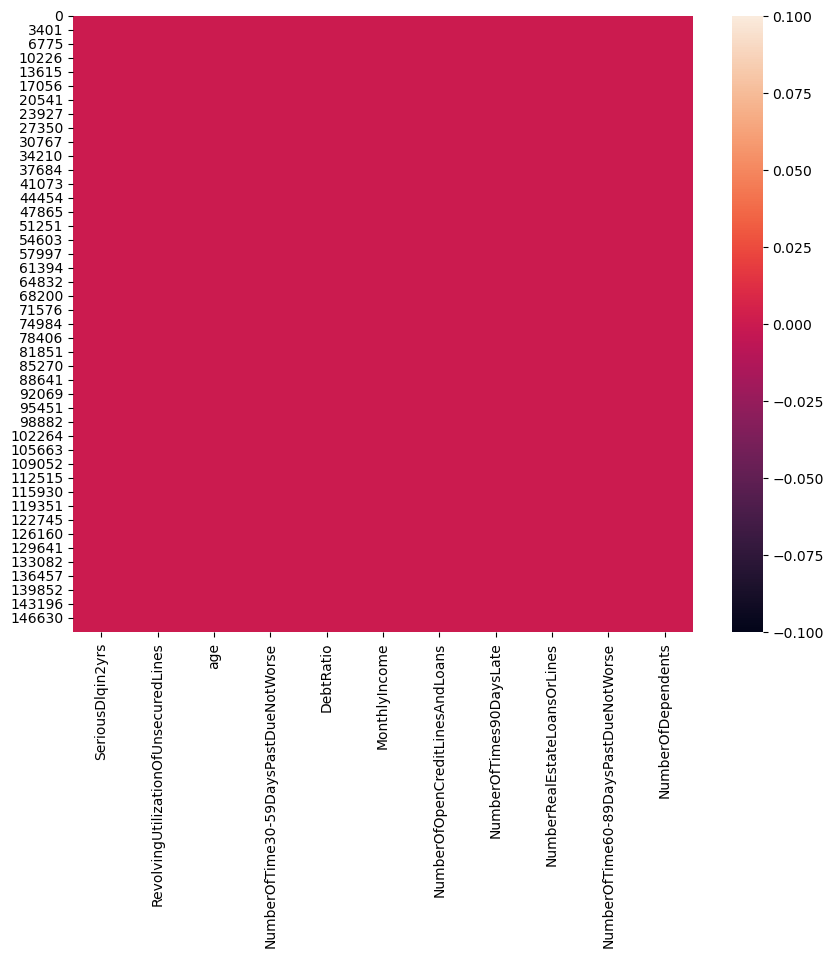

In [18]:
#VISUALISING THE DATAFRAME
#USING HEATMAP

plt.figure(figsize=(10,8))
sns.heatmap(new_df.isnull())
plt.show()

OBSERVATION :
    WE HAVE SUCCESSFULLY HANDLED THE MISSING VALUES!!

# EXPLORATORY DATA ANALYSIS

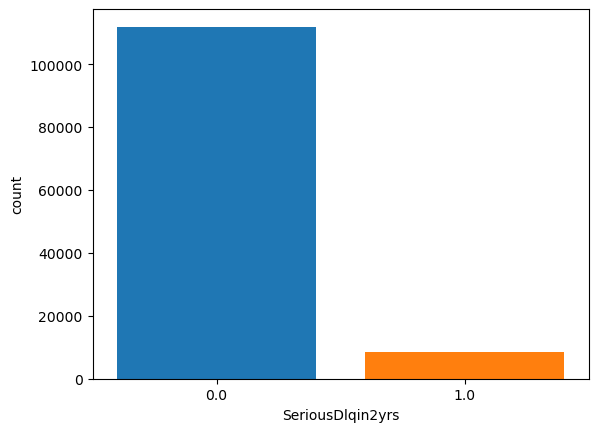

In [19]:
#USING COUNTPLOT TO VISUALISE REFRESH RATE

sns.countplot(x = new_df['SeriousDlqin2yrs'], data = new_df , saturation= 1)
plt.show()

OBSERVATION:
    WE CAN CLEARLY SEE THAT IT IS AN UNBALANCED DATASET!!

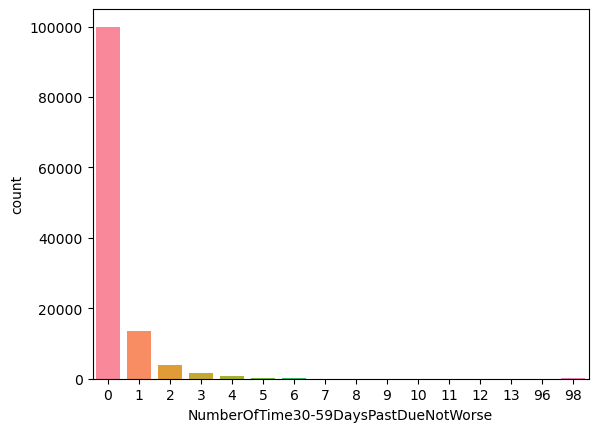

In [20]:
#USING COUNTPLOT TO VISUALISE REFRESH RATE

sns.countplot(x = new_df['NumberOfTime30-59DaysPastDueNotWorse'], data = new_df , saturation= 1)
plt.show()

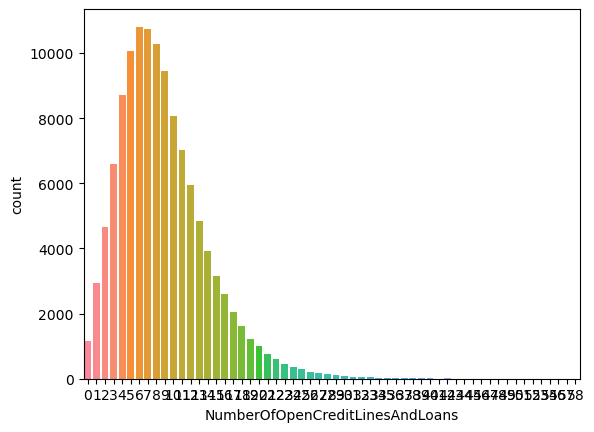

In [21]:
#USING COUNTPLOT TO VISUALISE REFRESH RATE

sns.countplot(x = new_df['NumberOfOpenCreditLinesAndLoans'], data = new_df , saturation= 1)
plt.show()

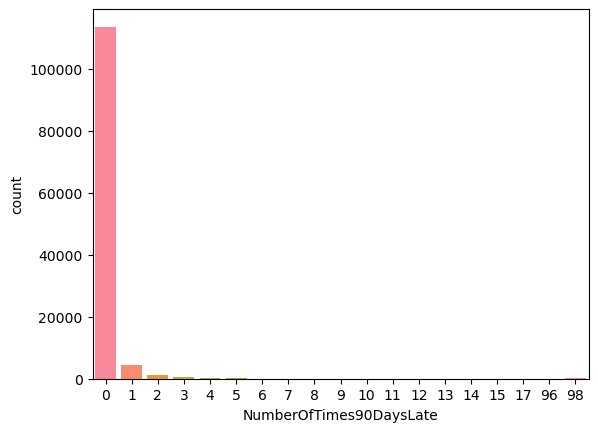

In [22]:
#USING COUNTPLOT TO VISUALISE REFRESH RATE

sns.countplot(x = new_df['NumberOfTimes90DaysLate'], data = new_df , saturation= 1)
plt.show()

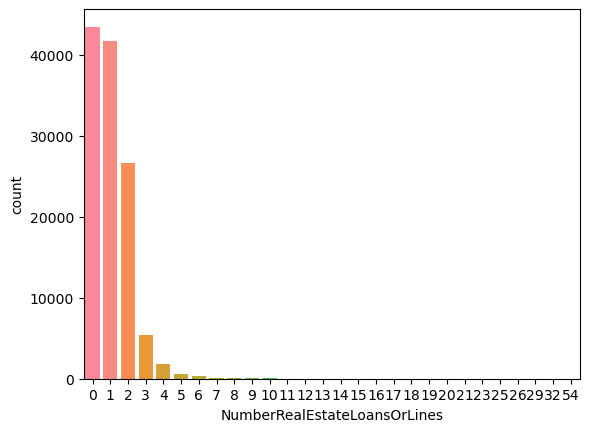

In [23]:
#USING COUNTPLOT TO VISUALISE REFRESH RATE

sns.countplot(x = new_df['NumberRealEstateLoansOrLines'], data = new_df , saturation= 1)
plt.show()

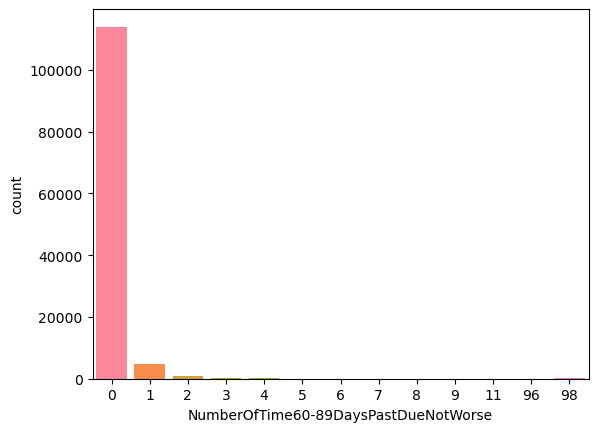

In [24]:
#USING COUNTPLOT TO VISUALISE REFRESH RATE

sns.countplot(x = new_df['NumberOfTime60-89DaysPastDueNotWorse'], data = new_df , saturation= 1)
plt.show()

OUT OF ALL THE VARIABLES FEATURES =[NumberOfTime30-59DaysPastDueNotWorse,
                                    NumberOfTimes90DaysLate,
                                    NumberOfTime60-89DaysPastDueNotWorse]
HAVE MOST OF THE TERMS AS THE SAME TERM(CONSTANT TERM)

# HANDLING OUTLIERS

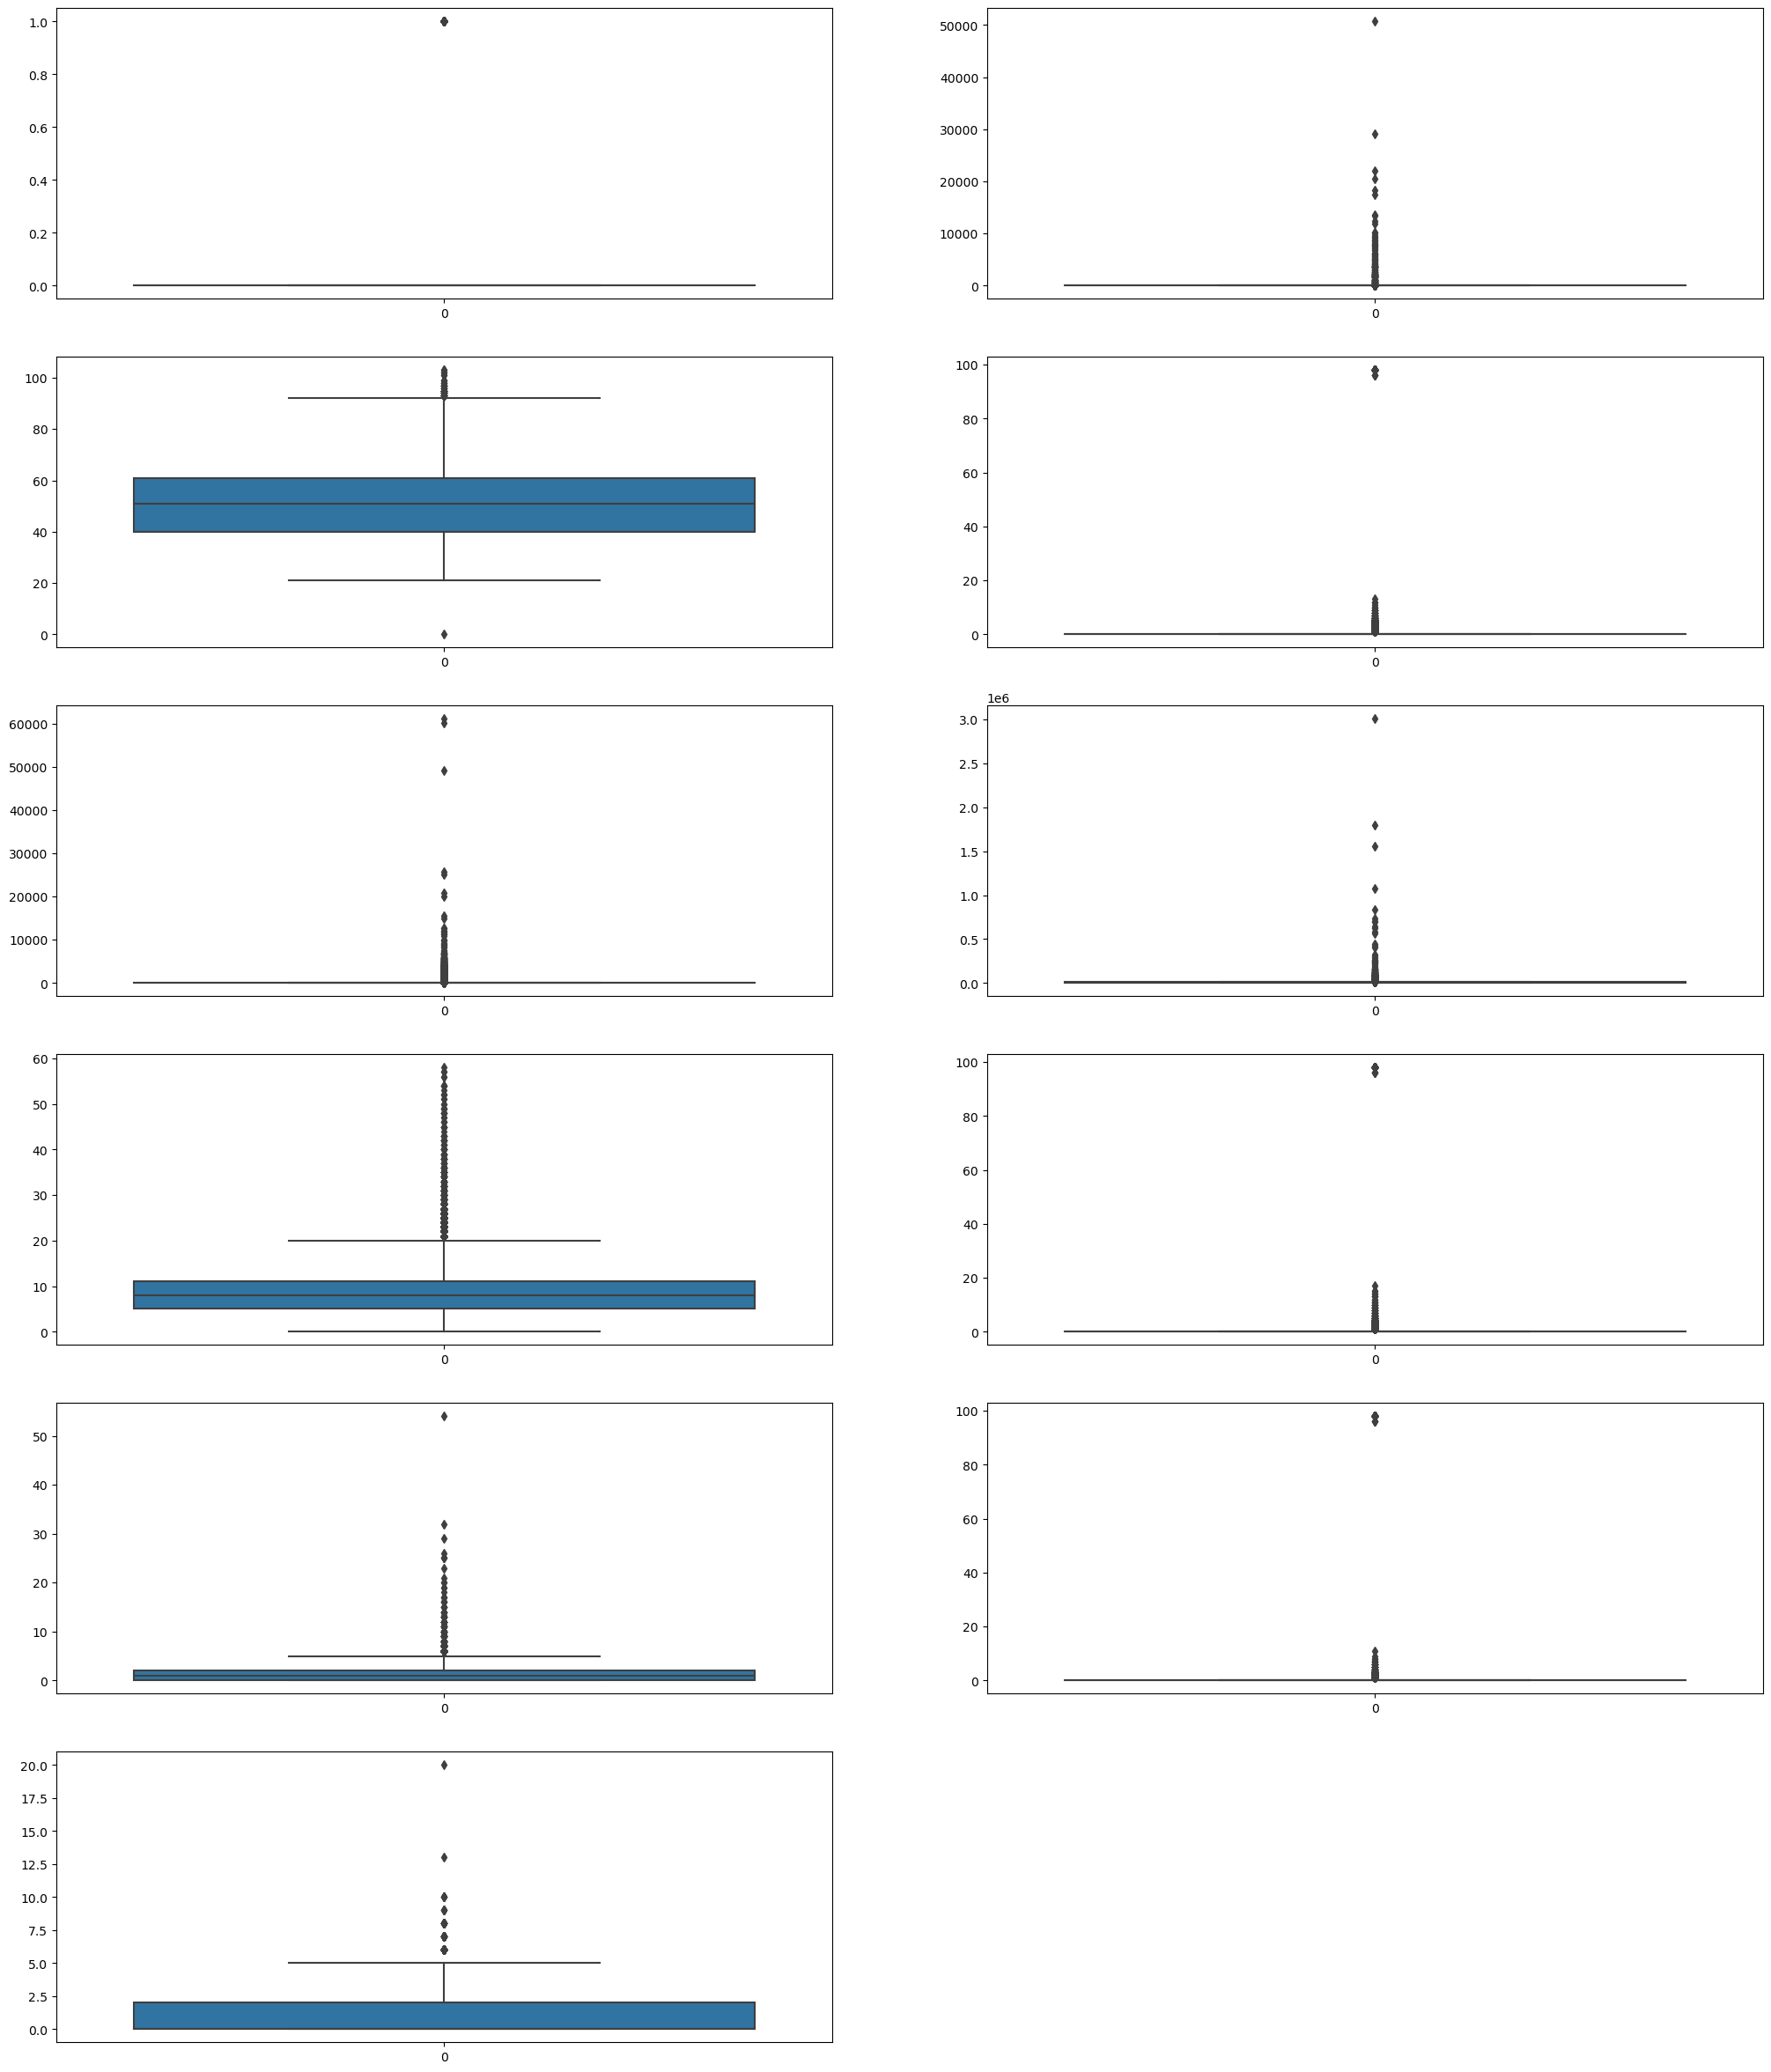

In [25]:
#PLOTTING BOXPLOT TO CHECK VISUALISE OUTLIERS(IF ANY) IN THE DATAFRAME


num_var= ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

plt.figure(figsize=(25,30))
for i , var in enumerate(num_var):
    plt.subplot(6,2,i+1)
    sns.boxplot(new_df[var])
    plt.show

In [26]:
new_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [27]:
#SORTING THE DATAFRAME


new_df['RevolvingUtilizationOfUnsecuredLines'] = sorted(new_df['RevolvingUtilizationOfUnsecuredLines'])
new_df['age'] = sorted(new_df['age'])
new_df['NumberOfTime30-59DaysPastDueNotWorse'] = sorted(new_df['NumberOfTime30-59DaysPastDueNotWorse'])
new_df['DebtRatio'] = sorted(new_df['DebtRatio'])
new_df['MonthlyIncome'] = sorted(new_df['MonthlyIncome'])
new_df['NumberOfOpenCreditLinesAndLoans'] = sorted(new_df['NumberOfOpenCreditLinesAndLoans'])
new_df['NumberOfTimes90DaysLate'] = sorted(new_df['NumberOfTimes90DaysLate'])
new_df['NumberRealEstateLoansOrLines'] = sorted(new_df['NumberRealEstateLoansOrLines'])
new_df['NumberOfTime60-89DaysPastDueNotWorse'] = sorted(new_df['NumberOfTime60-89DaysPastDueNotWorse'])
new_df['NumberOfDependents'] = sorted(new_df['NumberOfDependents'])



C:\Users\ritik\AppData\Local\Temp\ipykernel_4724\437504312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RevolvingUtilizationOfUnsecuredLines'] = sorted(new_df['RevolvingUtilizationOfUnsecuredLines'])
C:\Users\ritik\AppData\Local\Temp\ipykernel_4724\437504312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = sorted(new_df['age'])
C:\Users\ritik\AppData\Local\Temp\ipykernel_4724\437504312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [28]:
#CALCULATING 1ST , 3RD QUANTILE AND INTERQUANTILE RANGE AND

out_lier = ['RevolvingUtilizationOfUnsecuredLines', 'age',
        'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents'] 

for i, var in enumerate(out_lier):
    q1 = new_df[var].quantile(0.25)
    q3 = new_df[var].quantile(0.75)
    iqr = q3 - q1
   
    print("--------------------------------------------------")
    print("25th percentile(q1) value of feature ", var,":" ,q1 )
    print("75th percentile(q3) value of feature ", var,":" ,q3 )
    print("IQR of feature ", var,":" ,iqr )
    print("--------------------------------------------------") 

--------------------------------------------------
25th percentile(q1) value of feature  RevolvingUtilizationOfUnsecuredLines : 0.035083989
75th percentile(q3) value of feature  RevolvingUtilizationOfUnsecuredLines : 0.579427876
IQR of feature  RevolvingUtilizationOfUnsecuredLines : 0.544343887
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  age : 40.0
75th percentile(q3) value of feature  age : 61.0
IQR of feature  age : 21.0
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  DebtRatio : 0.143387604
75th percentile(q3) value of feature  DebtRatio : 0.482559431
IQR of feature  DebtRatio : 0.339171827
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  MonthlyIncome : 3400.0
75th percentile(q3) value of feature  MonthlyInc

In [29]:
#CALCULATING UPPER AND LOWER LIMITS 

out_lier = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents']

def limits(feature,q1,q3,iqr):
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    print("upper limit ( ", feature, " )" , " : ", upper_limit)
    print("lower limit ( ", feature, " )" , " : ", lower_limit)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    

limits("RevolvingUtilizationOfUnsecuredLines", 0.035083989, 0.579427876, 0.544343887)
limits("age", 40.0,61.0,21.0)

limits("DebtRatio", 0.143387604,0.482559431,0.339171827)
limits("MonthlyIncome", 3400.0, 8249.0, 4849.00)
limits("NumberOfOpenCreditLinesAndLoans", 5.0,11.0,6.0)

limits("NumberRealEstateLoansOrLines", 0.0,2.0,2.0)

limits("NumberOfDependents", 0.0,2.0,2.0)

upper limit (  RevolvingUtilizationOfUnsecuredLines  )  :  1.3959437065
lower limit (  RevolvingUtilizationOfUnsecuredLines  )  :  -0.7814318415
--------------------------------------------------------
--------------------------------------------------------
upper limit (  age  )  :  92.5
lower limit (  age  )  :  8.5
--------------------------------------------------------
--------------------------------------------------------
upper limit (  DebtRatio  )  :  0.9913171715
lower limit (  DebtRatio  )  :  -0.3653701365
--------------------------------------------------------
--------------------------------------------------------
upper limit (  MonthlyIncome  )  :  15522.5
lower limit (  MonthlyIncome  )  :  -3873.5
--------------------------------------------------------
--------------------------------------------------------
upper limit (  NumberOfOpenCreditLinesAndLoans  )  :  20.0
lower limit (  NumberOfOpenCreditLinesAndLoans  )  :  -4.0
-----------------------------------------

In [30]:
#CAPPING - changing the outliers to upper and lower limits


out_lier = [ 'RevolvingUtilizationOfUnsecuredLines', 'age',
        'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 
       'NumberRealEstateLoansOrLines', 
       'NumberOfDependents']

df_cap = new_df.copy()

def cap_out_lier(var,upper_limit,lower_limit):
    df_cap[var]=np.where(
    df_cap[var]>upper_limit,
    upper_limit,
    np.where(
    df_cap[var]<lower_limit,
    lower_limit,
    df_cap[var]))
    



cap_out_lier("RevolvingUtilizationOfUnsecuredLines", 1.3959437065, -0.7814318415)
cap_out_lier("age", 92.5,8.5)

cap_out_lier("DebtRatio", 0.9913171715, -0.3653701365)
cap_out_lier("MonthlyIncome", 15522.5, -3873.5)
cap_out_lier("NumberOfOpenCreditLinesAndLoans", 20.0,-4.0)
cap_out_lier("NumberRealEstateLoansOrLines", 5.0 , -3.0)
cap_out_lier("NumberOfDependents", 5.0 , -3.0)

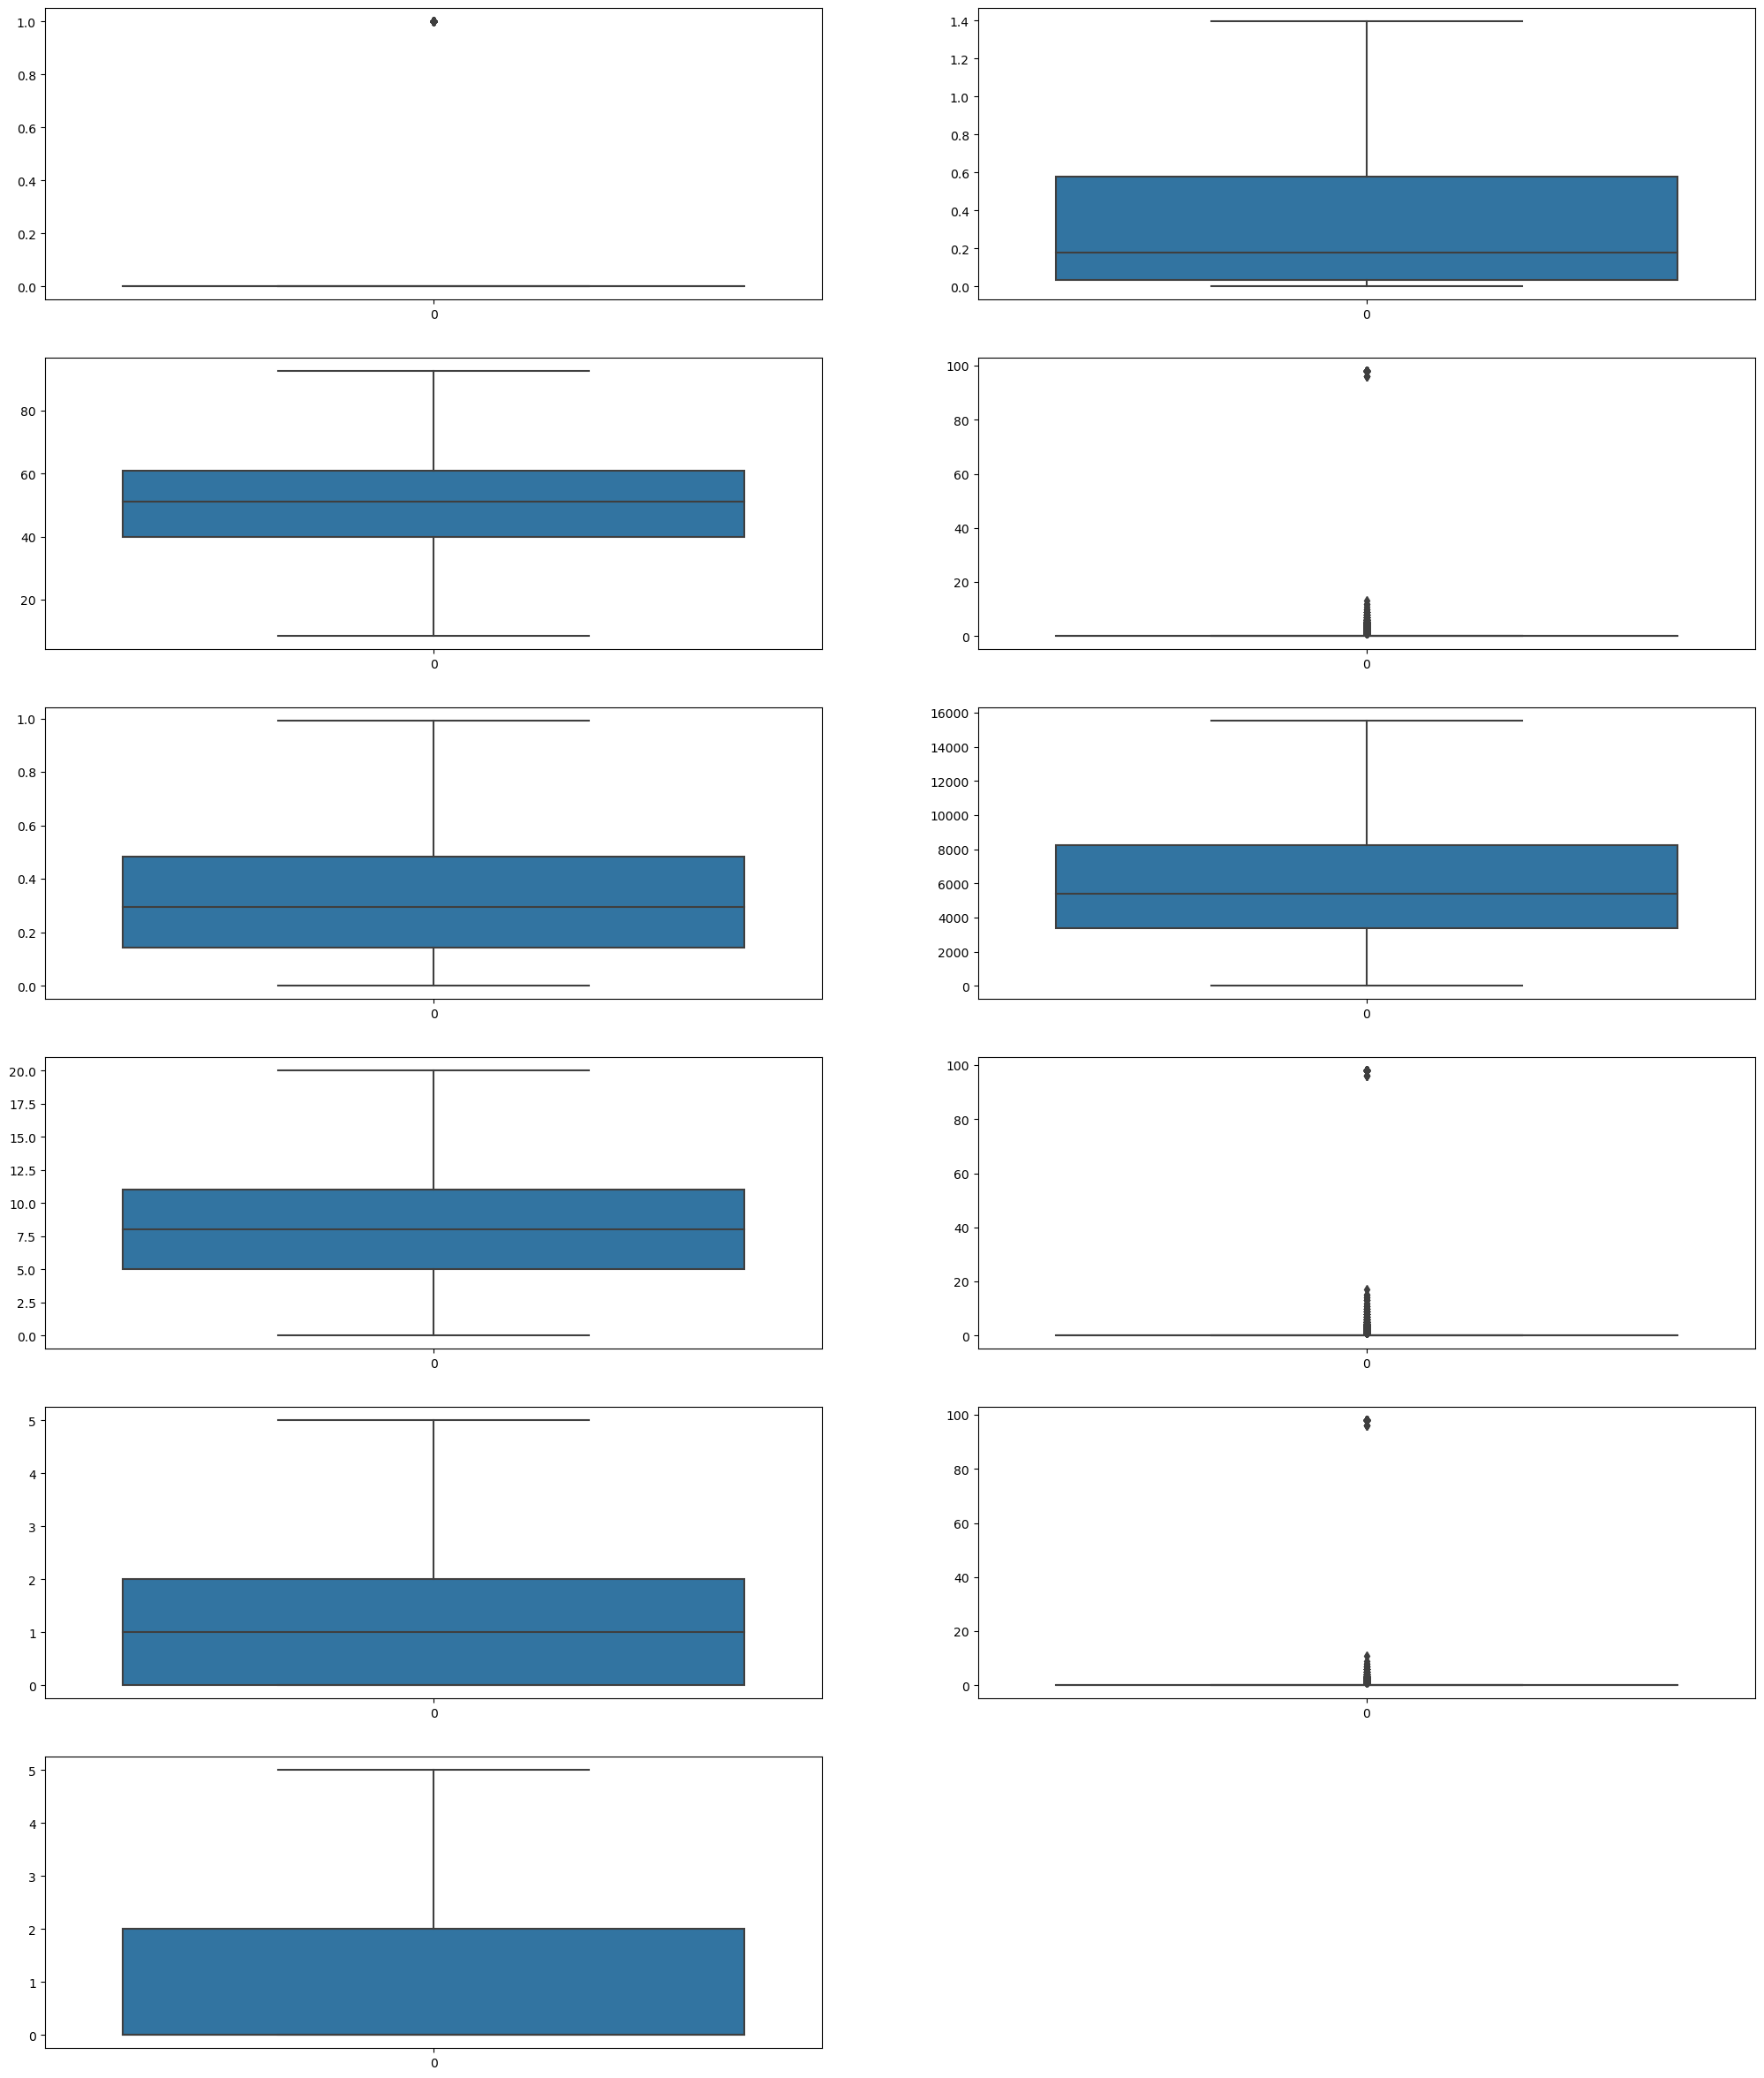

In [31]:
#PLOTTING BOXPLOT TO CHECK VISUALISE OUTLIERS(IF ANY) IN THE DATAFRAME


out_lier = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

plt.figure(figsize=(25,30))
for i , var in enumerate(num_var):
    plt.subplot(6,2,i+1)
    sns.boxplot(df_cap[var])
    plt.show

OBERVATION :
    THE OUTLIERS HAVE BEEN PERFECTELY HANDLED AS IS CLEARLY VISIBLE FROM THE BOXPLOT!!

NOTE :
NOW WE DONT NEED TO PERFORM LABEL ENCODING AS THE ALL THE FEATURES ARE ALREADY NUMERICAL FEATURE.

# SPLITTING

In [32]:
#SPLITTING INTO X MATRIX AND y VECTOR

X = df_cap.drop(columns=['SeriousDlqin2yrs'],axis=1)
y = df_cap[['SeriousDlqin2yrs']]

In [33]:

# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(120269, 10)
(120269, 1)


In [34]:
## Get the Fraud and the normal dataset 

yes = df_cap[df_cap['SeriousDlqin2yrs']==1]

no = df_cap[df_cap['SeriousDlqin2yrs']==0]

In [35]:
print(yes.shape,no.shape)

(8357, 11) (111912, 11)


# UNDER SAMPLING

In [36]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)

In [38]:
X_res.shape,y_res.shape

((16714, 10), (16714, 1))

In [39]:
#SPLITTING  THE DATA IN TRAIN AND TEST

X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size=0.2 , random_state=2)

print('shape of X_train : ', X_train.shape)
print('shape of X_test : ', X_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)


shape of X_train :  (13371, 10)
shape of X_test :  (3343, 10)
shape of y_train :  (13371, 1)
shape of y_test :  (3343, 1)


In [40]:
type(y_test)

pandas.core.frame.DataFrame

# FEATURE SELECTION

In [41]:
# determine the mutual information

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.38575272, 0.36625777, 0.10677255, 0.40077867, 0.38366204,
       0.33973208, 0.0903207 , 0.22979128, 0.08440346, 0.15078016])

In [42]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

DebtRatio                               0.400779
RevolvingUtilizationOfUnsecuredLines    0.385753
MonthlyIncome                           0.383662
age                                     0.366258
NumberOfOpenCreditLinesAndLoans         0.339732
NumberRealEstateLoansOrLines            0.229791
NumberOfDependents                      0.150780
NumberOfTime30-59DaysPastDueNotWorse    0.106773
NumberOfTimes90DaysLate                 0.090321
NumberOfTime60-89DaysPastDueNotWorse    0.084403
dtype: float64

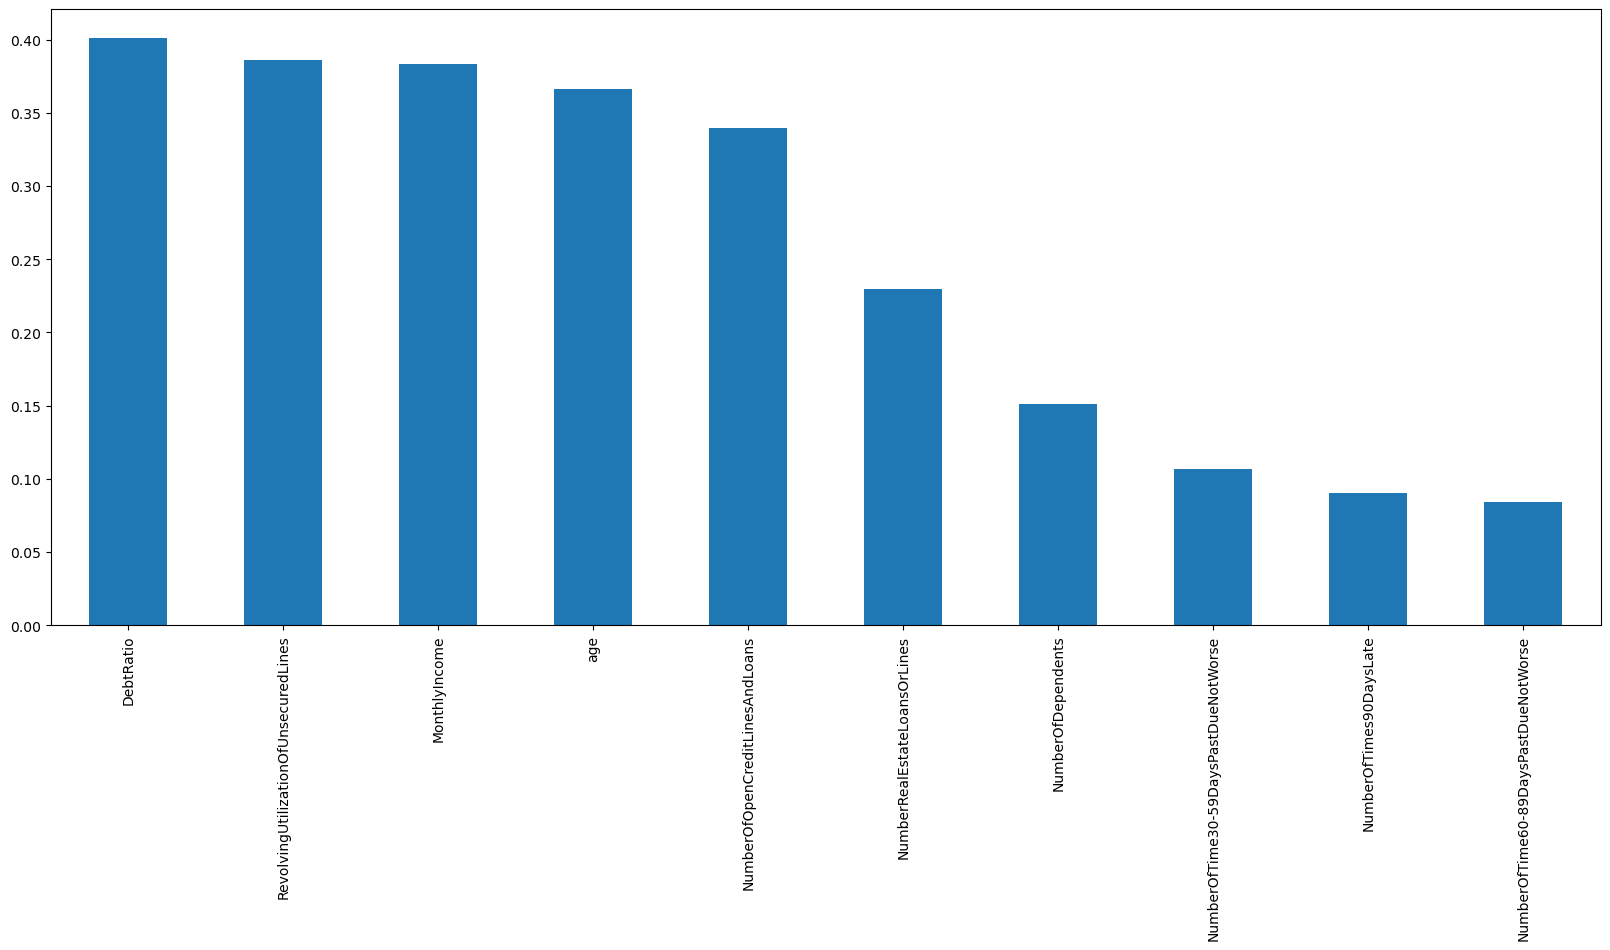

In [43]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

In [44]:
#No we Will select the  top 8 important features

sel_five_cols = SelectKBest(mutual_info_classif, k=8)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

In [45]:
#DROPPING THE UNWANTED FEATURE FROM THE DATA  

X_train_fea = X_train.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
X_test_fea = X_test.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)


In [46]:
#CHECKING THE COLUMNS NOW
X_train_fea.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

# FEATURE SCALING

In [47]:
#CREATING OBJECT

sc = StandardScaler()
sc.fit(X_train_fea)

StandardScaler()

In [48]:
type(X_train_fea)

pandas.core.frame.DataFrame

In [49]:
#TRANSFORMING THE DATASETS

X_train_sc = sc.transform(X_train_fea)
X_test_sc = sc.transform(X_test_fea)

In [50]:
type(X_train_sc)

numpy.ndarray

In [51]:
#CONVERTING THE ARRAY INTO DATAFRAME

X_train_sc = pd.DataFrame(X_train_sc,columns =['DebtRatio','MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines','age','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'])
X_test_sc = pd.DataFrame(X_test_sc,columns = ['DebtRatio','MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines','age','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'])

In [52]:
type(X_train_sc)

pandas.core.frame.DataFrame

In [53]:
X_train_sc.columns

Index(['DebtRatio', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

# MODEL TRAINING

RANDOM FOREST

In [54]:
#MAKING AN OBJECT OF THE CLASS
classifier=RandomForestClassifier()

#FITTING THE DATA
classifier.fit(X_train_sc,y_train)

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [55]:
#MODEL EVALUATION

y_pred=classifier.predict(X_test_sc)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1465  137]
 [ 256 1485]]
0.8824409213281483
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1602
         1.0       0.92      0.85      0.88      1741

    accuracy                           0.88      3343
   macro avg       0.88      0.88      0.88      3343
weighted avg       0.88      0.88      0.88      3343



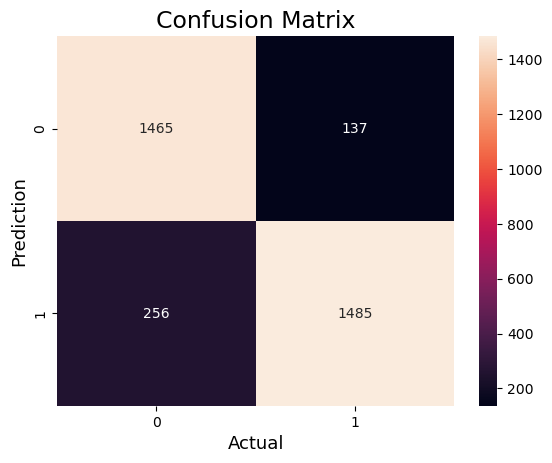

In [56]:
#Plot the confusion matrix.
arr = confusion_matrix(y_test, y_pred)
sns.heatmap(arr,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [57]:
print("precision" , precision_score(y_test,y_pred))
print("recall_score" , recall_score(y_test,y_pred))
print("f1_score" , f1_score(y_test,y_pred))

precision 0.9155363748458692
recall_score 0.8529580700746697
f1_score 0.8831400535236396


LOGISTIC REGRESSION

In [58]:
#MAKING THE MODEL
model = LogisticRegression()
model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
y_pred,y_test

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0., 1., 1., ..., 1., 1., 0.]),
        SeriousDlqin2yrs
 5443                0.0
 6624                0.0
 14044               1.0
 6789                0.0
 4741                0.0
 ...                 ...
 16146               1.0
 8805                1.0
 11867               1.0
 13542               1.0
 16361               1.0
 
 [3343 rows x 1 columns])

In [59]:
#PRINTING THE PRECISION , RECALL , F1_SCORE
print("precision" , precision_score(y_test,y_pred))
print("recall_score" , recall_score(y_test,y_pred))
print("f1_score" , f1_score(y_test,y_pred))

precision 0.8858729179518815
recall_score 0.8248133256748995
f1_score 0.8542534205829864


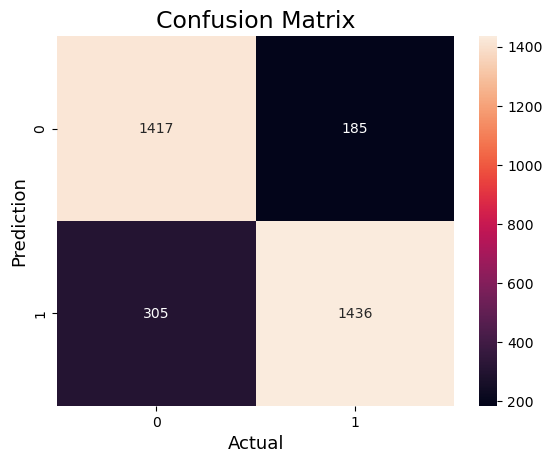

In [60]:
#Plot the confusion matrix.
arr = confusion_matrix(y_test, y_pred)
sns.heatmap(arr,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

OBSERVATION:
    WE CAN CLEARY SEE THAT RANDOM FOREST ALGORITHM IS PERFORMING REALLY WELL AS COMPARED TO LOGISTIC REGRESSION.THERFORE WE ARE GOING TO PROCEED WITH RANDOM FOREST ONLY.

# MAKING THE PICKLE FILE

In [61]:
import pickle

In [62]:
filename = 'file.pkl'
pickle.dump(classifier,open(filename,'wb'))